In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [54]:
from sklearn.datasets import load_iris

In [55]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [56]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [57]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [58]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
df.rename(columns={'sepal length (cm)': 'sepal_length','sepal width (cm)': 'sepal_width','petal length (cm)': 'petal_length','petal width (cm)': 'petal_width'}, inplace=True)

In [83]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
88,5.6,3.0,4.1,1.3
65,6.7,3.1,4.4,1.4
32,5.2,4.1,1.5,0.1
60,5.0,2.0,3.5,1.0
10,5.4,3.7,1.5,0.2


In [61]:
y = iris.target
X = df

In [84]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
y.shape,X.shape

((150,), (150, 4))

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dt = DecisionTreeClassifier()

In [66]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
dt.score(X_test, y_test)*100

100.0

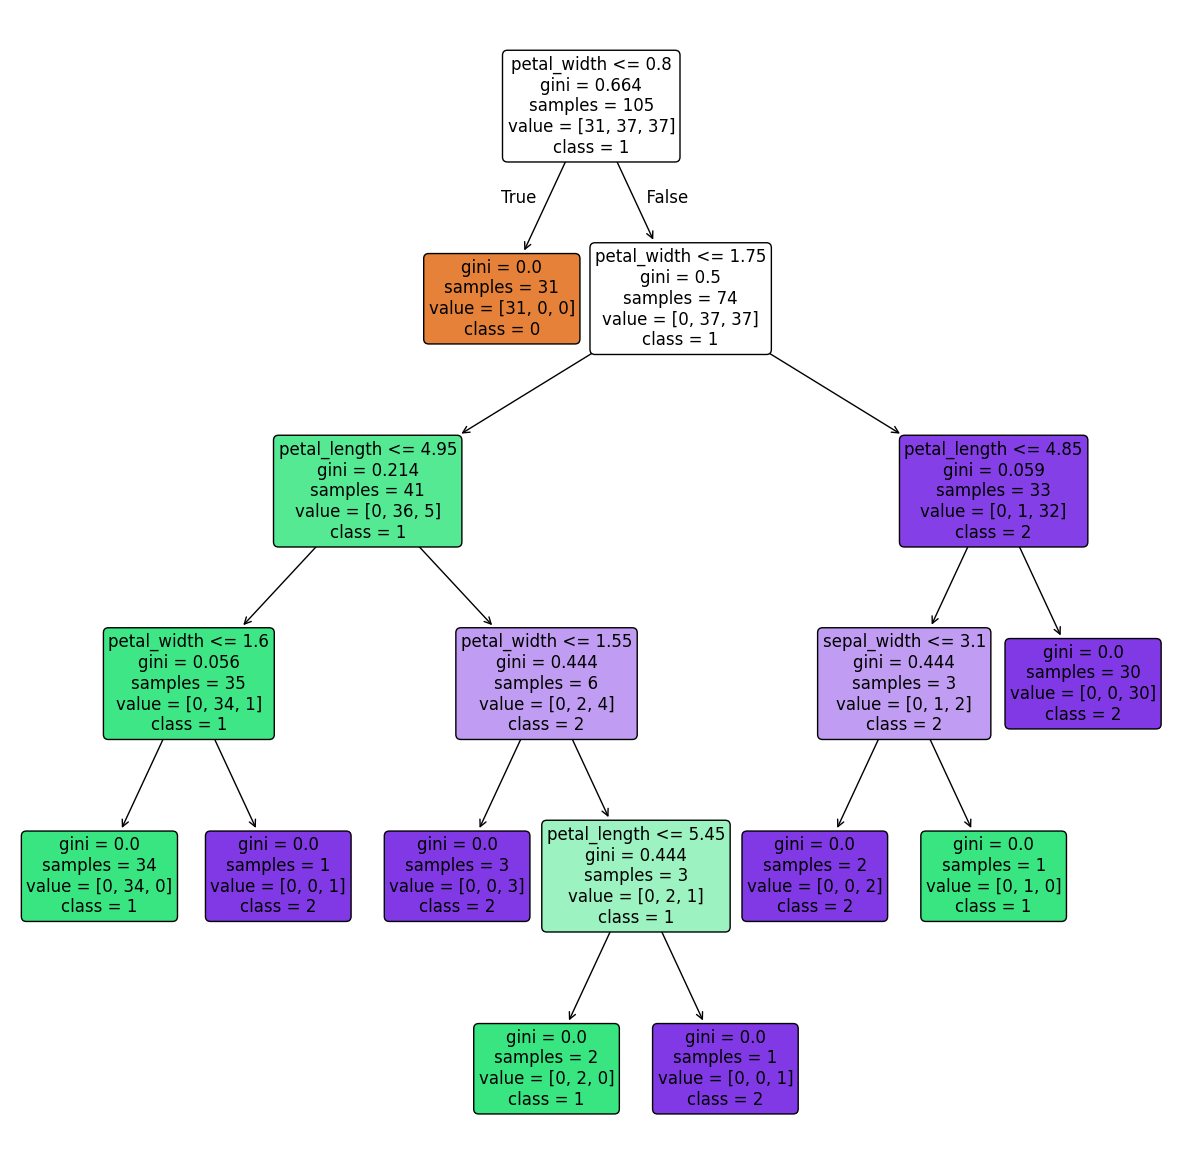

In [ ]:
### Visualizing the Decision Tree
from sklearn import tree
plt.figure(figsize=(15,15)) 
tree.plot_tree(
    dt, 
    filled=True,  
    fontsize=12,  
    feature_names=dt.feature_names_in_,  
    class_names=dt.classes_.astype(str), 
    rounded=True,  
    proportion=False,  
    label='all'  
)
plt.show()


In [69]:
y_pred = dt.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [71]:
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



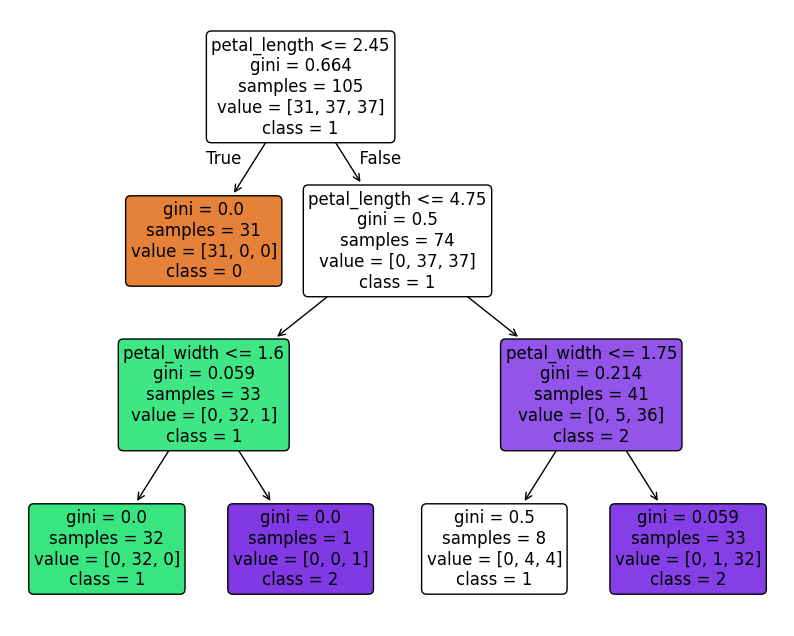

In [79]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
plt.figure(figsize=(10,8))
tree.plot_tree(dt, filled=True, fontsize=12, feature_names=dt.feature_names_in_, class_names=dt.classes_.astype(str), rounded=True, proportion=False, label='all')
plt.show()

In [80]:
dt.score(X_test, y_test)*100

100.0

In [85]:
### more experiments

In [86]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [87]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_clusters_per_class=1, random_state=11)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=53)

In [89]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
dt.score(X_test, y_test)*100

86.66666666666667

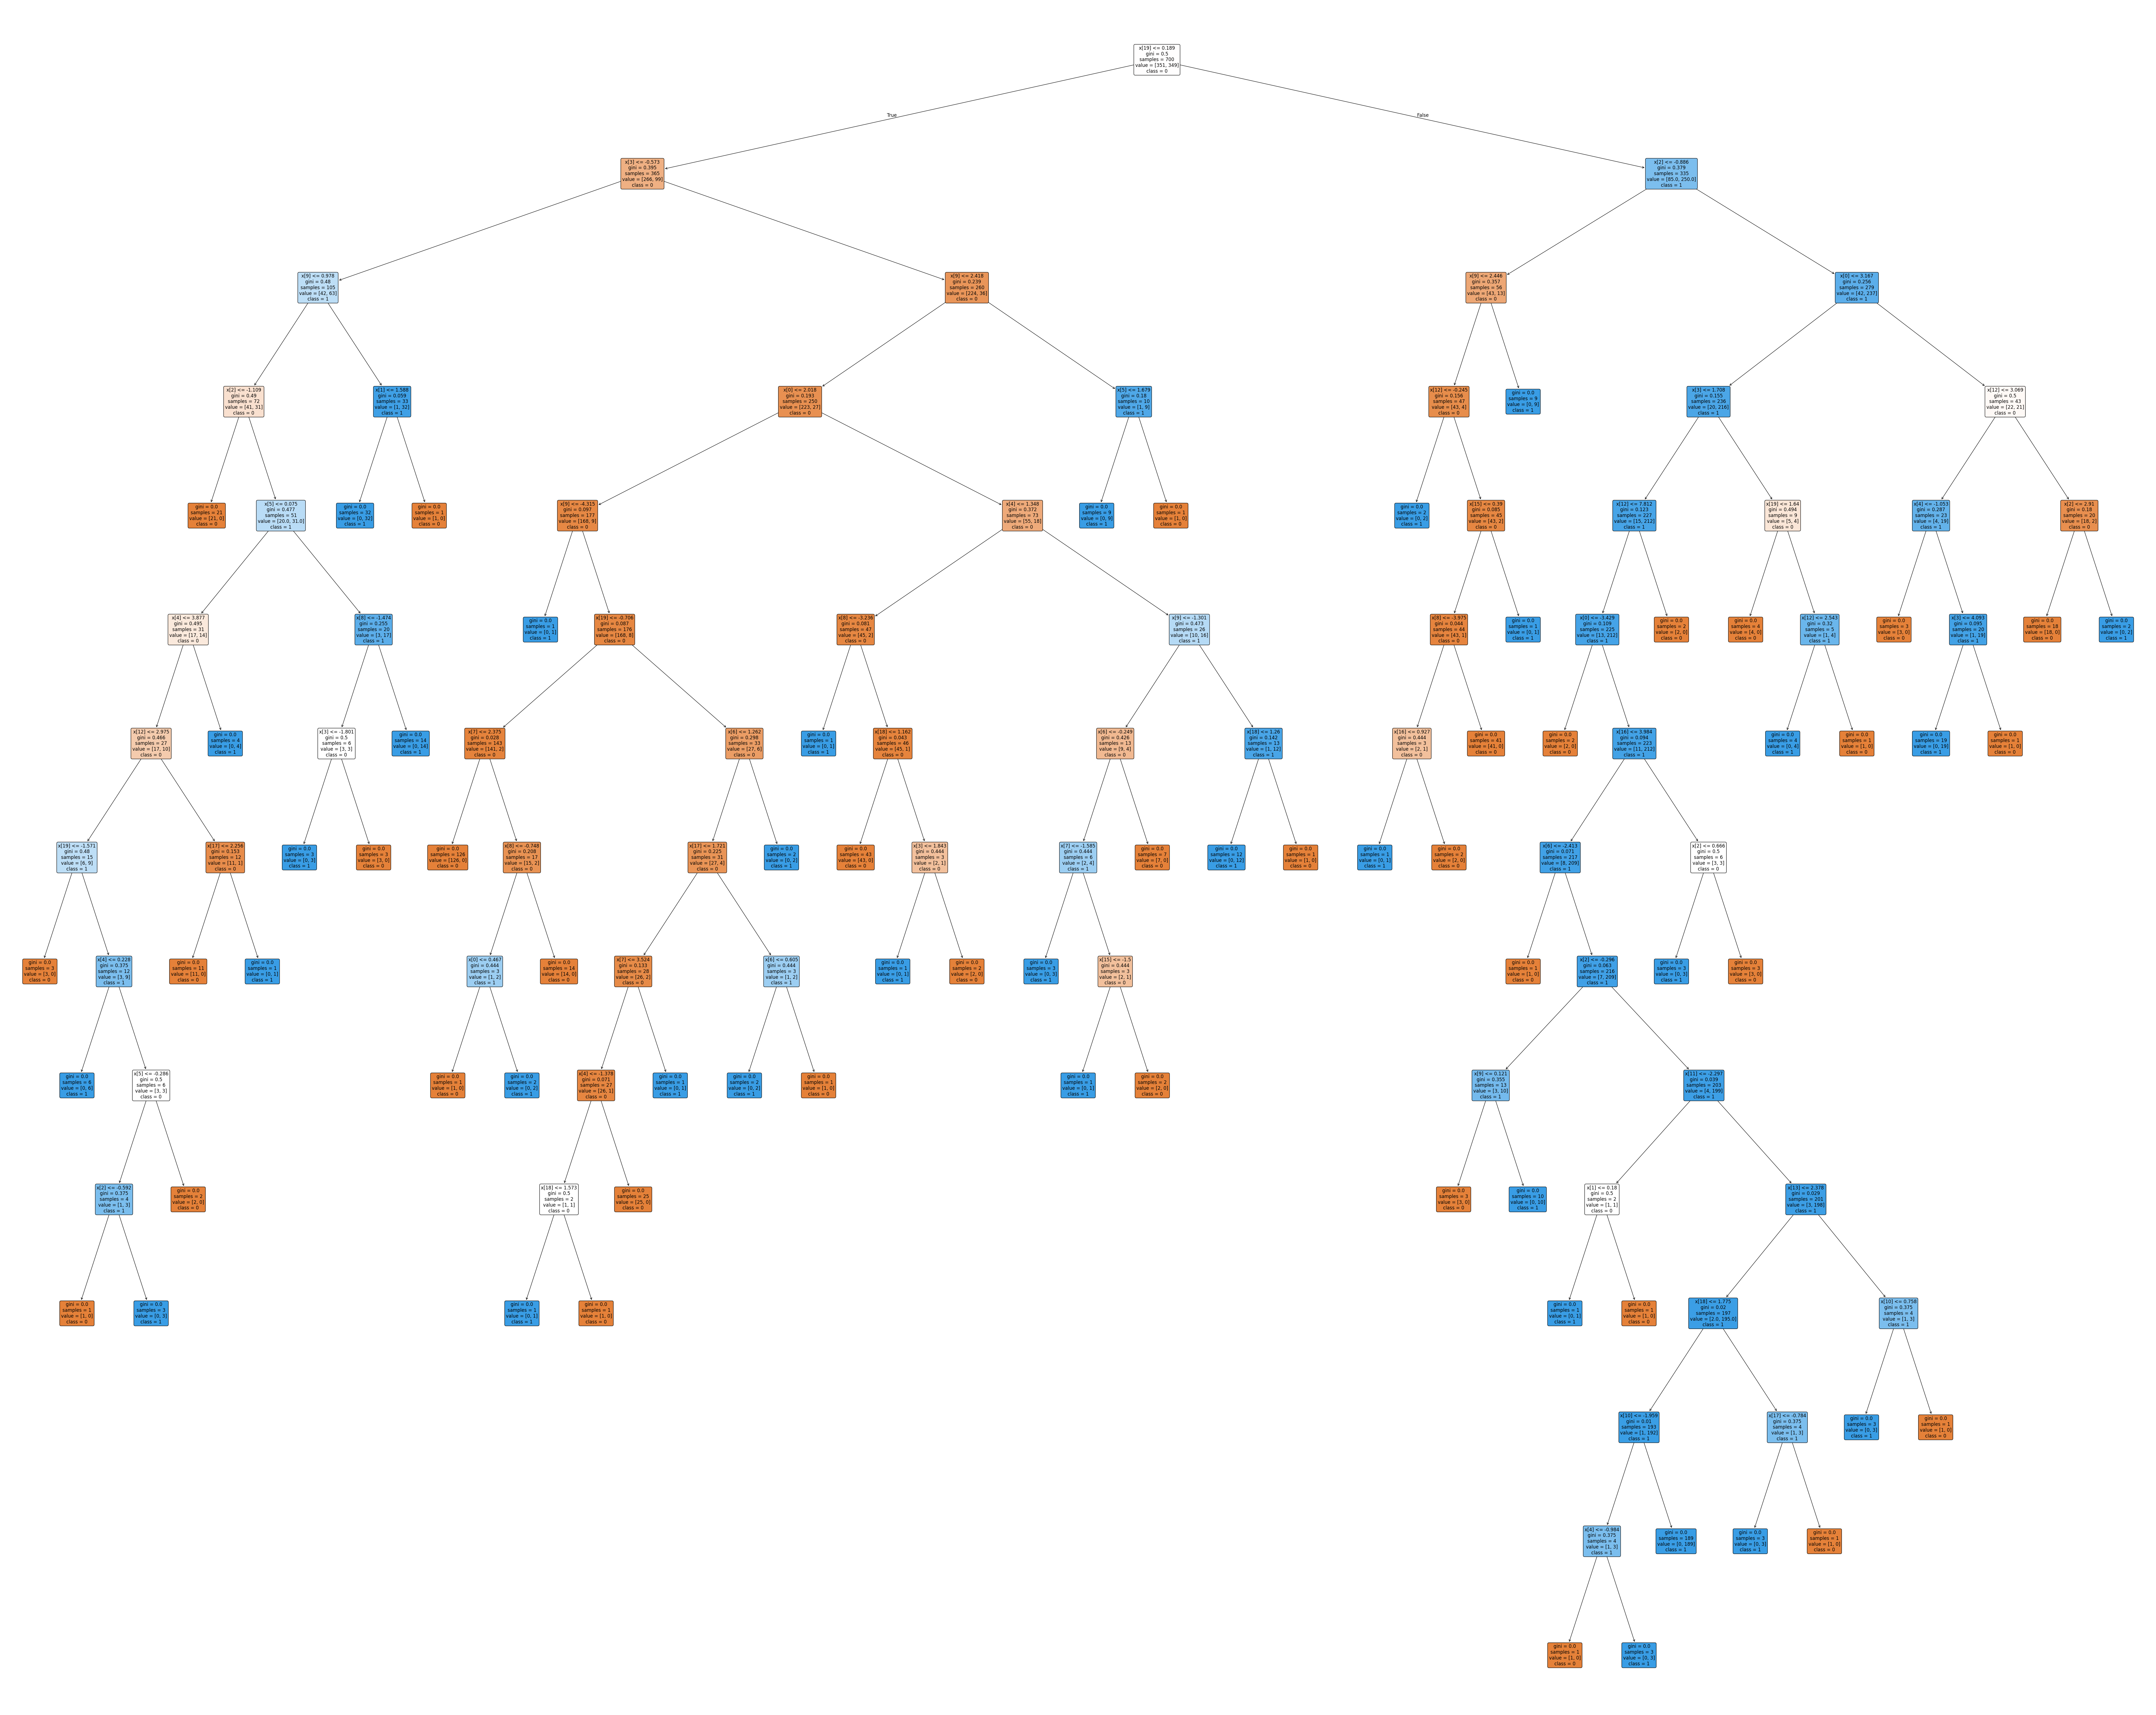

In [100]:
plt.figure(figsize=(100,80))
tree.plot_tree(dt, filled=True, fontsize=12, class_names=dt.classes_.astype(str), rounded=True, proportion=False, label='all')
plt.show()

In [113]:
## hyperparameter tuning
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=2,
                             min_samples_leaf=1, max_features=1)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)*100

72.66666666666667

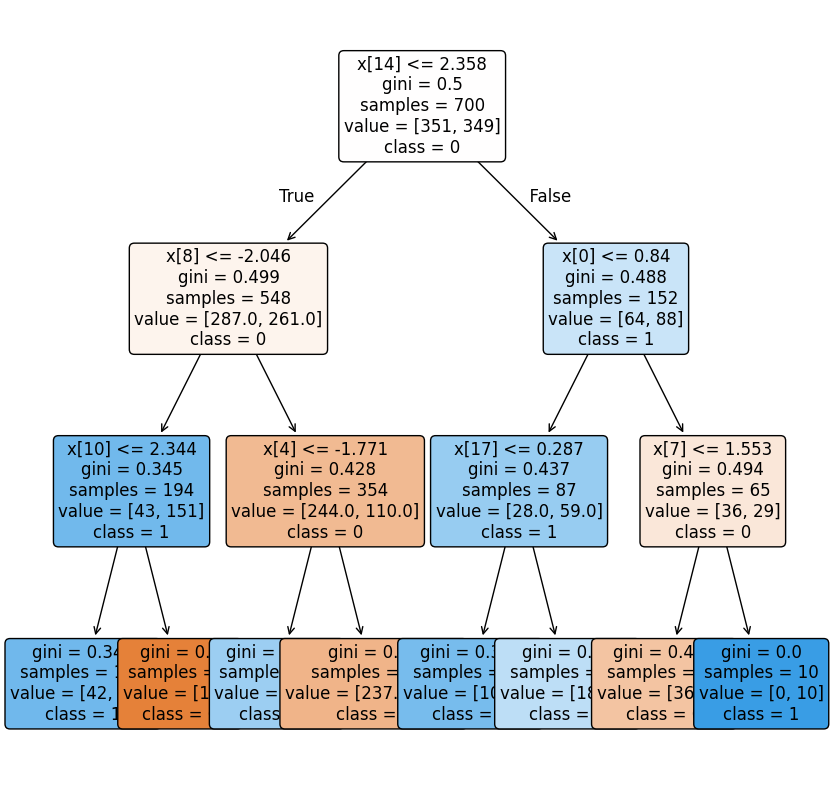

In [114]:
plt.figure(figsize=(10,10))
tree.plot_tree(dt, filled=True, fontsize=12, class_names=dt.classes_.astype(str), rounded=True, proportion=False, label='all')
plt.show()

### pre pruning decision tree

In [219]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'splitter': ['best']
    }
gcv = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=3, n_jobs=-1)

In [220]:
import warnings
warnings.filterwarnings("ignore")
gcv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best']})

In [221]:
gcv.score(X_test, y_test)*100

84.0

In [222]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
confusion_matrix(y_test, gcv.predict(X_test))

array([[121,  28],
       [ 20, 131]])